frozenset({Edge(type=EdgeType.E, vertices=frozenset({'C', 'B'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'A', 'D', 'C', 'B'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'B'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'D'}), parameters={})})


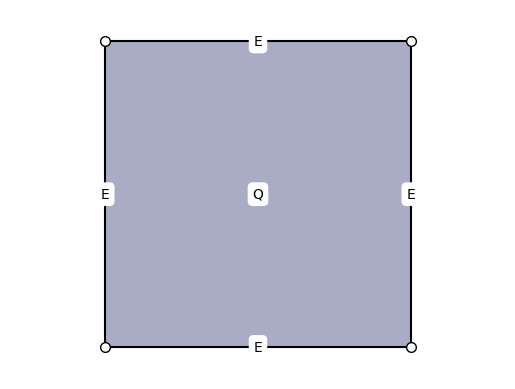

In [1]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_0 import Prod0

hg = Hypergraph()
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "B"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "C"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "D"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "A"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "C", "D"}), {"R": 0}))

hg.set_vertex_parameter("A", {"x": 0, "y": 0})
hg.set_vertex_parameter("B", {"x": 1, "y": 0})
hg.set_vertex_parameter("C", {"x": 1, "y": 1})
hg.set_vertex_parameter("D", {"x": 0, "y": 1})

prod0 = Prod0()
new_hg = prod0.apply(hg)
if new_hg:
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")